In [118]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

3.6.0 |Anaconda 4.3.1 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
1.11.3
0.19.2


In [119]:
#Read the entire dataset
#Using date parser to convert all dates into datetime
df_ad_state_metro_1 = pd.read_pickle('./data/TV_AD_AIRINGS_STATE_METRO_AREA_5.pkl')
df_ad_state_metro_1.head(5)

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,cycle,subjects,candidates,type,message,date_created,ad_duration_secs,metro_area_state,state,metro_area
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59,2016-09-09 00:13:29,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25,2016-09-06 21:58:55,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Raleigh-Durham-Fayetteville, NC]",NC,Raleigh-Durham-Fayetteville
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25,2016-09-04 16:24:55,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20,2016-08-30 17:59:50,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Tampa-St. Petersburg, FL]",FL,Tampa-St. Petersburg
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22,2016-09-06 07:02:52,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas


In [120]:
df_ad_state_metro_1.shape

(85127, 23)

In [121]:
#Checking states again
df_ad_state_metro_1['state'].unique()

array(['NV', 'NC', 'FL', 'OH', 'IA', 'PA', 'CO', 'WI', 'National', 'AZ',
       'NH', 'VA', 'NY'], dtype=object)

In [122]:
#Removing 'NY' which has only 47 rows
df_ad_state_metro_1 = df_ad_state_metro_1[df_ad_state_metro_1['state'] != 'NY']

In [123]:
df_ad_state_metro_1['state'].unique()

array(['NV', 'NC', 'FL', 'OH', 'IA', 'PA', 'CO', 'WI', 'National', 'AZ',
       'NH', 'VA'], dtype=object)

#Expected rows in the new dataset
85127-47  = 85080

In [124]:
##confirmed that after dropping NY, there are 85080 rows
df_ad_state_metro_1.shape

(85080, 23)

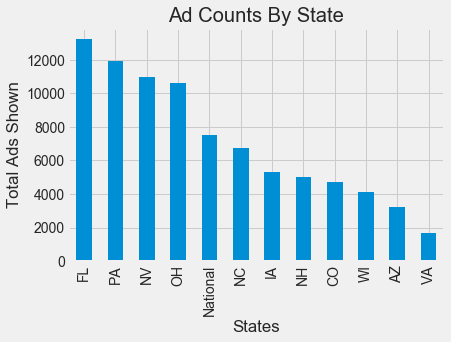

In [128]:
#First plot
#Number of ads by state

df_ad_state_metro_1['state'].value_counts().plot(kind='bar')
plt.title("Ad Counts By State")
plt.ylabel("Total Ads Shown")
plt.xlabel("States")
plt.savefig('ana_final_pics/Count_of_ads_by_state.png')

In [129]:
#Checking the variability in ad duration to see if we need to consider it to 
#determine ad volume
df_ad_state_metro_1['ad_duration_secs'].unique()

array([  30.,   93.,   36.,   89.,   57.,   80.,   15.,   70.,   60.,
         68.,   42.,   43.,   38.,   45.,   63.,   28.,   86.,   69.,
         81.,   59.,   31.,  105.,  103.,  118.,   88.,   19.,   76.,
         61.,   79.,   32.,   29.,   71.,  125.,  137.,  124.,   67.,
         56.,   55.,   33.,   94.,   37.,   91.,   35.,   87.,   65.,
         66.,   50.,  184.,   97.,   54.,  180.,  140.,  161.,   18.,
         40.,   83.,   78.,   84.,   85.,   62.,  120.,   75.])

In [131]:
df_ad_state_metro_1['ad_duration_secs'].sum()

2823972.0

In [11]:
df_ad_state_metro_1['ad_duration_secs'].value_counts()
#Since there are ads with varying duration, will have to include duration 

30.0     65852
60.0      5848
29.0      4881
31.0      2666
32.0      2539
15.0       840
62.0       558
61.0       294
84.0       232
91.0       193
120.0      141
63.0       115
37.0       108
85.0        91
54.0        85
70.0        62
93.0        57
36.0        53
81.0        44
75.0        38
124.0       33
55.0        25
69.0        24
43.0        22
180.0       21
65.0        20
88.0        19
89.0        18
19.0        18
57.0        16
         ...  
45.0        13
67.0        12
40.0        12
161.0       10
97.0         8
68.0         7
76.0         6
137.0        6
59.0         6
33.0         6
71.0         5
35.0         5
140.0        5
28.0         5
125.0        4
56.0         4
83.0         3
94.0         3
105.0        3
184.0        3
103.0        2
42.0         2
87.0         2
78.0         1
50.0         1
18.0         1
66.0         1
38.0         1
79.0         1
80.0         1
Name: ad_duration_secs, dtype: int64

In [132]:

#Since there are ads with varying duration, will have to include duration 
df_ad_state_metro_2 = df_ad_state_metro_1.copy().groupby('state')['ad_duration_secs'].sum().reset_index()
df_ad_state_metro_2.sort_values('ad_duration_secs', ascending=False, inplace=True)

In [13]:
df_ad_state_metro_2

,state,ad_duration_secs
2,FL,434766.0
9,PA,387274.0
6,NV,370905.0
8,OH,351404.0
7,National,279262.0
4,NC,214829.0
3,IA,179859.0
5,NH,161872.0
1,CO,152241.0
11,WI,132487.0


In [133]:
#Adding new column for total hours of ad time per state
df_ad_state_metro_2['ad_duration_hours'] = df_ad_state_metro_2['ad_duration_secs']/3600

In [134]:
df_ad_state_metro_2

,state,ad_duration_secs,ad_duration_hours
2,FL,434766.0,120.768333
9,PA,387274.0,107.576111
6,NV,370905.0,103.029167
8,OH,351404.0,97.612222
7,National,279262.0,77.572778
4,NC,214829.0,59.674722
3,IA,179859.0,49.960833
5,NH,161872.0,44.964444
1,CO,152241.0,42.289167
11,WI,132487.0,36.801944


In [135]:
#Rounding to two decimal places
df_ad_state_metro_2['ad_duration_hours'] = round(df_ad_state_metro_2['ad_duration_secs']/3600,2)

In [136]:
df_ad_state_metro_2

,state,ad_duration_secs,ad_duration_hours
2,FL,434766.0,120.77
9,PA,387274.0,107.58
6,NV,370905.0,103.03
8,OH,351404.0,97.61
7,National,279262.0,77.57
4,NC,214829.0,59.67
3,IA,179859.0,49.96
5,NH,161872.0,44.96
1,CO,152241.0,42.29
11,WI,132487.0,36.80


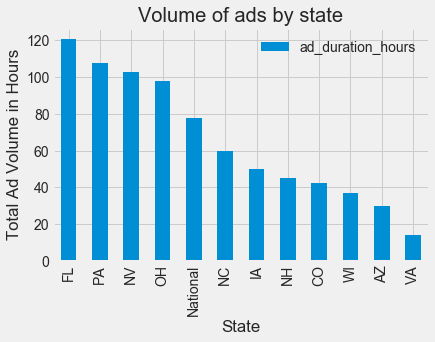

In [137]:
df_ad_state_metro_2.plot(x='state', y='ad_duration_hours', kind='bar')
plt.title("Volume of ads by state")
plt.ylabel("Total Ad Volume in Hours")
plt.xlabel("State")
plt.savefig('ana_final_pics/Volume_of_ads_by_state.png')

From above, it is known that the states line up in the same order in terms of count of ads and total duration of ads.

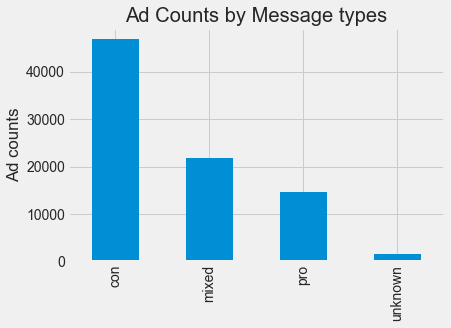

In [170]:
#No need to do a group by for a simple count of values in a field
df_ad_state_metro_1['message'].value_counts().plot(kind='bar')
plt.title("Ad Counts by Message types")
plt.ylabel("Ad counts")
plt.savefig('ana_final_pics/ad_count_by_message_type.png')

In [19]:
#Looking up candidates remaining in the dataset. Expecting to get 
#Hillary Clinton,Donald Trump, Jill Stein & Gary Johnson since this is after 8/1/2016.
#But find others clubbed along. Need to investigate this
df_ad_state_metro_1['candidates'].value_counts()

Donald Trump                                                                                               40988
Hillary Clinton                                                                                            21707
Donald Trump, Hillary Clinton                                                                              20763
Marco Rubio, Patrick Murphy                                                                                  552
Marco Rubio                                                                                                  348
Donald Trump, Gary Johnson, Gary Johnson, Hillary Clinton                                                    274
Donald Trump, Rob Portman, Ted Strickland                                                                    259
Gary Johnson, Gary Johnson                                                                                    78
Alan Grayson, Hillary Clinton, Marco Rubio, Pat Murphy                                          

In [20]:
#Researching ads where both candidates are there 
df_ad_state_metro_1[df_ad_state_metro_1['candidates'] =='Donald Trump, Hillary Clinton'].head(5)

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,cycle,subjects,candidates,type,message,date_created,ad_duration_secs,metro_area_state,state,metro_area
4226,5538,5183,KFXA,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",Panther Sports Talk,not news,2016-09-10 03:29:45,2016-09-10 03:30:15,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Economy, Jobs, Federal Budget, Taxes, Families","Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa]",IA,Ceder Rapids-Waterloo-Iowa City-Dublin
4227,5539,5183,KSNV,"Las Vegas, NV",Today,news,2016-09-09 09:40:47,2016-09-09 09:41:17,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Economy, Jobs, Federal Budget, Taxes, Families","Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas
4228,5540,5183,KTNV,"Las Vegas, NV",World News Now,news,2016-09-09 09:59:13,2016-09-09 09:59:43,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Economy, Jobs, Federal Budget, Taxes, Families","Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas
4229,5541,5183,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-08-30 21:49:29,2016-08-30 21:49:59,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Economy, Jobs, Federal Budget, Taxes, Families","Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Raleigh-Durham-Fayetteville, NC]",NC,Raleigh-Durham-Fayetteville
4230,5542,5183,KSNV,"Las Vegas, NV",News 3 Live Today,news,2016-09-09 11:58:05,2016-09-09 11:58:35,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Economy, Jobs, Federal Budget, Taxes, Families","Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas


Used the archive_id to view one of the ads where the candidates is 'Donald Trump, Hillary Clinton' and 
found that it was an ad by Donald Trump. So cannot go by candidates. Instead will have to go by sponsor and sponsortype.The field 'candidates' merely says the names of candidates mentioned in the ad.


In [21]:
#Investigating sponsor
df_ad_state_metro_1['sponsors'].value_counts()

Hillary for America                     37555
Donald J Trump For President            22393
Priorities USA Action                   11199
Rebuilding America Now                   2408
NextGen California Action Committee      1767
Women Vote!                              1102
Future45                                  960
NRA Institute for Legislative Action      791
Reform America Fund                       778
45 Committee                              766
National Rifle Assn                       634
Friends of Patrick Murphy                 553
Donald J. Trump For President             520
Internet Archive                          511
Stop Hillary PAC                          470
Great America PAC                         453
Marco Rubio For Senate 2016               412
MoveOn.org                                409
Purple PAC                                274
Strickland for Senate                     259
Democratic National Cmte                  206
Correct The Record                

From above it seems like sponsor field will lead us to who the ad was for.

In [22]:
#Investigating sponsor_types
df_ad_state_metro_1['sponsor_types'].value_counts()

Multiple                       37579
Candidate Committee            23715
Super PAC                      18688
Non Profit                      1615
Hybrid Super PAC                1452
Unknown                         1063
PAC                              939
Joint Fundraising Committee       28
Corporation                        1
Name: sponsor_types, dtype: int64

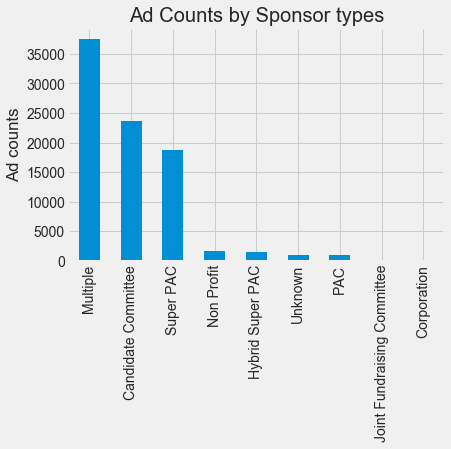

In [139]:
df_ad_state_metro_1['sponsor_types'].value_counts().plot(kind='bar')
plt.title("Ad Counts by Sponsor types")
plt.ylabel("Ad counts")
plt.savefig('ana_final_pics/ad_count_by_sponsor_type.png')


From above, Sponsor_types field will not help in determining whether the ad was in favor of the name in 'candidates'
field or against.

In [24]:
df_ad_state_metro_3 = df_ad_state_metro_1.copy().groupby('sponsor_types')['ad_duration_secs'].sum().reset_index()
df_ad_state_metro_3.sort_values('ad_duration_secs', ascending=False, inplace=True)


In [25]:

df_ad_state_metro_3

,sponsor_types,ad_duration_secs
4,Multiple,1295423.0
0,Candidate Committee,713584.0
7,Super PAC,603831.0
8,Unknown,63899.0
2,Hybrid Super PAC,63010.0
5,Non Profit,50282.0
6,PAC,30499.0
3,Joint Fundraising Committee,3414.0
1,Corporation,30.0


In [26]:
#Rounding to two decimal places
df_ad_state_metro_3['ad_duration_hours'] = round(df_ad_state_metro_3['ad_duration_secs']/3600,2)

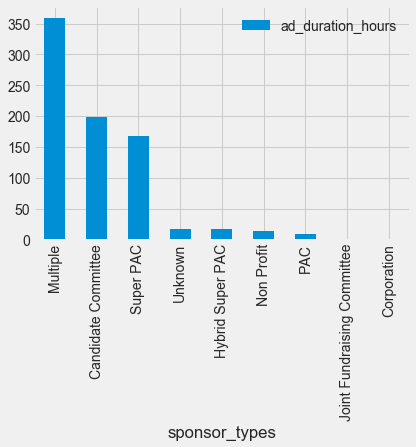

In [138]:
df_ad_state_metro_3.plot(x='sponsor_types', y='ad_duration_hours', kind='bar' )
plt.savefig('ana_final_pics/ad_duration_hours_by_sponsor_type.png')

Noted no change in trends by populating count of ads and volums of ads by sponsor types.

#Reading sponsor classification file.
From the sponsor data, which classifies the sponsors, we can find which ad supported 
which candidate.

In [140]:
sponsors_df_1 = pd.read_csv('data/sponsors_list_final.csv',header=None, 
                          names=['Sponsors', 'Sponsor_Classification'])
sponsors_df_1.head(10)

,Sponsors,Sponsor_Classification
0,Reform America Fund,R_PAC
1,Hillary for America,Clinton
2,Make America Number One,R_PAC
3,Rebuilding America Now,R_PAC
4,NextGen California Action Committee,D_PAC
5,Women Vote!,D_PAC
6,Reclaim America PAC,Other
7,Priorities USA Action,D_PAC
8,Donald J Trump For President,Trump
9,Kirkpatrick For Senate,Other


In [141]:
#Setting sponsor as index

sponsors_df_1.set_index('Sponsors', inplace=True)

In [142]:
#get sponsor_class
#Wrote a function to return sponsor class using get_value method
def get_sponsor_class(sponsor):
    return(sponsors_df_1.get_value(sponsor, 'Sponsor_Classification'))
    

In [143]:
df_ad_state_metro_1['sponsors'][0]


'Hillary for America'

In [144]:
#Test it with one value
#proof of concept
get_sponsor_class(df_ad_state_metro_1['sponsors'][0])

'Clinton'

In [145]:
sponsors_df_1.head(5)

,Sponsor_Classification
Sponsors,
Reform America Fund,R_PAC
Hillary for America,Clinton
Make America Number One,R_PAC
Rebuilding America Now,R_PAC
NextGen California Action Committee,D_PAC


In [146]:
#Adding a new column 'sponsor_class'
df_ad_state_metro_2 = df_ad_state_metro_1.copy()
df_ad_state_metro_2['sponsor_class'] = df_ad_state_metro_2['sponsors'].map(get_sponsor_class)

In [147]:
df_ad_state_metro_2.head(4)

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,subjects,candidates,type,message,date_created,ad_duration_secs,metro_area_state,state,metro_area,sponsor_class
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59,2016-09-09 00:13:29,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas,Clinton
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25,2016-09-06 21:58:55,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Raleigh-Durham-Fayetteville, NC]",NC,Raleigh-Durham-Fayetteville,Clinton
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25,2016-09-04 16:24:55,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas,Clinton
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20,2016-08-30 17:59:50,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Tampa-St. Petersburg, FL]",FL,Tampa-St. Petersburg,Clinton


In [148]:
#Checking the Sponsor_class column
df_ad_state_metro_2['sponsor_class'].value_counts()

Clinton    37555
Trump      22913
D_PAC      14870
R_PAC       7602
Other       1777
D_COM        206
Johnson       82
R_COM         72
Stein          3
Name: sponsor_class, dtype: int64

Looking at the values above, we need to further clssify the sponsor as 
"Republican' or 'Democratic" to figure out who the ad is supporting.

In [149]:
#Getting rid of rows with sponsor_type = 'Other'
df_ad_state_metro_2 = df_ad_state_metro_2[df_ad_state_metro_2['sponsor_class'] != 'Other']

In [38]:
df_ad_state_metro_2.shape

(83303, 24)

In [150]:
#Creating a dictionary to identify sponsor_party
party_dict = {'Clinton': 'D',
              'Trump': 'R',
              'D_PAC': 'D',
              'R_PAC': 'R',
              'D_COM': 'D',
              'Johnson': 'I',
              'R_COM': 'R',
              'Stein': 'I'
             }

In [151]:
#map spnsor_class to dixtionary to get sponsor_party
df_ad_state_metro_2['sponsor_party'] = df_ad_state_metro_2['sponsor_class'].map(party_dict)

In [152]:
df_ad_state_metro_2.head(5)
#Checked that sponsor type is populated properly

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,candidates,type,message,date_created,ad_duration_secs,metro_area_state,state,metro_area,sponsor_class,sponsor_party
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59,2016-09-09 00:13:29,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas,Clinton,D
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25,2016-09-06 21:58:55,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Raleigh-Durham-Fayetteville, NC]",NC,Raleigh-Durham-Fayetteville,Clinton,D
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25,2016-09-04 16:24:55,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas,Clinton,D
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20,2016-08-30 17:59:50,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Tampa-St. Petersburg, FL]",FL,Tampa-St. Petersburg,Clinton,D
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22,2016-09-06 07:02:52,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas,Clinton,D


In [153]:
#Checking for Trump
df_ad_state_metro_2[df_ad_state_metro_2['sponsor_class'] == 'Trump'].head(5)

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,candidates,type,message,date_created,ad_duration_secs,metro_area_state,state,metro_area,sponsor_class,sponsor_party
2628,3767,5495,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",Americas Newsroom With Bill Hemmer and Martha ...,news,2016-08-02 13:46:27,2016-08-02 13:47:47,PolAd_HillaryClinton_ao5qw,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,con,2016-09-12 14:49:00,80.0,"[San Francisco-Oakland-San Jose, CA]",National,San Francisco-Oakland-San Jose,Trump,R
4226,5538,5183,KFXA,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",Panther Sports Talk,not news,2016-09-10 03:29:45,2016-09-10 03:30:15,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,"Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa]",IA,Ceder Rapids-Waterloo-Iowa City-Dublin,Trump,R
4227,5539,5183,KSNV,"Las Vegas, NV",Today,news,2016-09-09 09:40:47,2016-09-09 09:41:17,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,"Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas,Trump,R
4228,5540,5183,KTNV,"Las Vegas, NV",World News Now,news,2016-09-09 09:59:13,2016-09-09 09:59:43,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,"Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas,Trump,R
4229,5541,5183,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-08-30 21:49:29,2016-08-30 21:49:59,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,"Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Raleigh-Durham-Fayetteville, NC]",NC,Raleigh-Durham-Fayetteville,Trump,R


In [43]:
#Saving the dataframe to a pickle file
df_ad_state_metro_2.to_pickle('./data/TV_AD_AIRINGS_SPONSOR_CLASS_DATASET_6.pkl')

In [154]:
df_ad_state_party_3 = pd.read_pickle('./data/TV_AD_AIRINGS_SPONSOR_CLASS_DATASET_6.pkl')

In [165]:
df_ad_state_party_3.head()

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,candidates,type,message,date_created,ad_duration_secs,metro_area_state,state,metro_area,sponsor_class,sponsor_party
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59,2016-09-09 00:13:29,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas,Clinton,D
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25,2016-09-06 21:58:55,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Raleigh-Durham-Fayetteville, NC]",NC,Raleigh-Durham-Fayetteville,Clinton,D
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25,2016-09-04 16:24:55,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas,Clinton,D
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20,2016-08-30 17:59:50,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Tampa-St. Petersburg, FL]",FL,Tampa-St. Petersburg,Clinton,D
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22,2016-09-06 07:02:52,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas,Clinton,D


In [155]:
#Pivoting data on party to see number of ads
df_ad_state_party_4 = df_ad_state_party_3.copy().\
    groupby(['sponsor_party', 'message'])['message'].count()

In [156]:
df_ad_state_party_4.head()

sponsor_party  message
D              con        34016
               mixed       8600
               pro         8882
               unknown     1133
I              mixed          5
Name: message, dtype: int64

In [176]:
#Pivoting data on party to see the total ad volume
df_ad_state_party_5 = df_ad_state_party_3.copy().\
    groupby(['state', 'sponsor_party'])['ad_duration_secs'].sum()

In [177]:
type(df_ad_state_party_5)

pandas.core.series.Series

In [178]:
#Converting data into hours
df_ad_state_party_5 = round(df_ad_state_party_5/3600,2)

In [179]:
#unstack to convert into a df and set index to state
df_ad_state_party_5.unstack()

sponsor_party,D,I,R
state,,,
AZ,24.98,NaN,4.21
CO,15.96,NaN,25.82
FL,76.49,NaN,36.25
IA,36.76,0.77,12.17
NC,45.05,NaN,14.42
NH,25.16,NaN,18.73
NV,76.54,0.50,25.40
National,46.04,0.20,23.53
OH,62.76,0.01,32.06


In [180]:
df_ad_state_party_6 = df_ad_state_party_5.unstack()

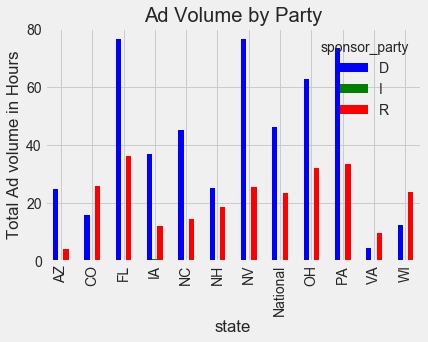

In [181]:
#Non object oriented way of plotting--not recommended
df_ad_state_party_6.plot(kind='bar', color='bgrm')
plt.title("Ad Volume by Party")
plt.ylabel('Total Ad volume in Hours')
#plt.savefig('ana_final_pics/ad_volume_by_part_without_diff.png')

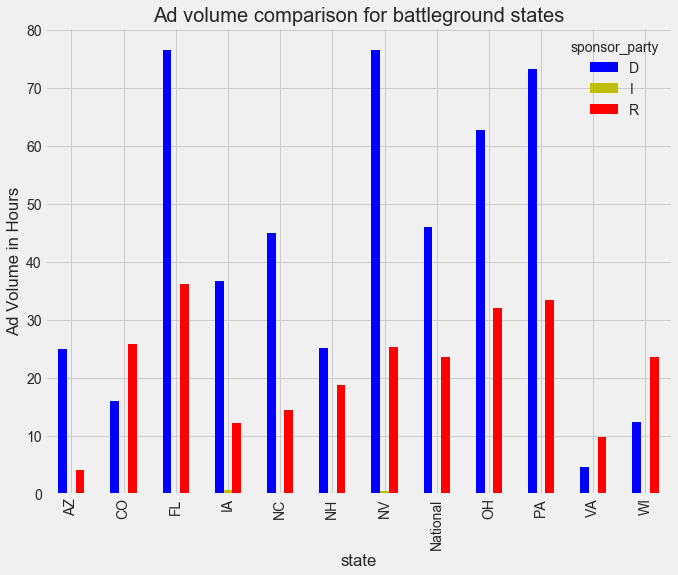

In [191]:
#Right way to plot with fig,ax --gives more control
fig, ax = plt.subplots(figsize=(10, 8))
ax = df_ad_state_party_6.plot.bar(ax=ax,color='byrm')

ax.set(ylabel= 'Ad Volume in Hours',
       title = 'Ad volume comparison for battleground states')
plt.savefig('ana_final_pics/ad_volume_by_part_without_diff.png')

In [184]:
df_ad_state_party_3[df_ad_state_party_3['sponsor_party'] == 'D'].groupby(['state', 'message'])['id'].count()

state     message
AZ        con        1802
          mixed       464
          pro         484
CO        con        1565
          mixed        26
          pro          35
FL        con        5020
          mixed      1644
          pro        1358
IA        con        2179
          mixed       807
          pro         828
NC        con        3006
          mixed       789
          pro        1128
NH        con        1939
          mixed       441
          pro         364
NV        con        4872
          mixed      1579
          pro        1445
National  con        2528
          mixed       425
          pro         540
          unknown    1132
OH        con        4253
          mixed      1061
          pro        1226
          unknown       1
PA        con        5306
          mixed      1209
          pro        1367
VA        con         485
          mixed        25
          pro          27
WI        con        1061
          mixed       130
          pro       

In [185]:
#Using unstack to flatten the data and convert to dataframe
type(df_ad_state_party_3[df_ad_state_party_3['sponsor_party'] == 'D'].\
            groupby(['state', 'message'])['id'].count().unstack())

pandas.core.frame.DataFrame

In [205]:
df_ad_state_party_7 = df_ad_state_party_3[df_ad_state_party_3['sponsor_party'] == 'D'].\
                        groupby(['state', 'message'])['id'].count().unstack()

In [206]:
df_ad_state_party_7

message,con,mixed,pro,unknown
state,,,,
AZ,1802.0,464.0,484.0,NaN
CO,1565.0,26.0,35.0,NaN
FL,5020.0,1644.0,1358.0,NaN
IA,2179.0,807.0,828.0,NaN
NC,3006.0,789.0,1128.0,NaN
NH,1939.0,441.0,364.0,NaN
NV,4872.0,1579.0,1445.0,NaN
National,2528.0,425.0,540.0,1132.0
OH,4253.0,1061.0,1226.0,1.0


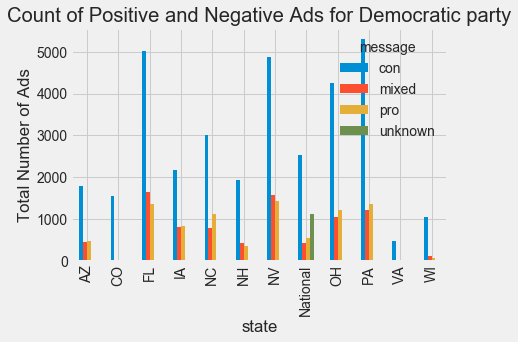

In [207]:
df_ad_state_party_7.plot(kind='bar')
plt.ylabel('Total Number of Ads')
plt.title("Count of Positive and Negative Ads for Democratic party")

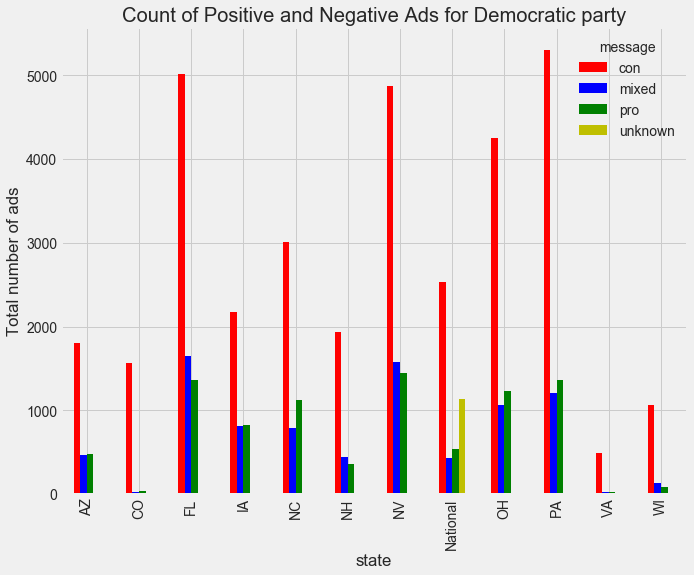

In [208]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = df_ad_state_party_7.plot.bar(ax=ax,color='rbgy')

ax.set(ylabel= 'Total number of ads',
       title = 'Count of Positive and Negative Ads for Democratic party') 
plt.savefig('ana_final_pics/count_pos_vs_neg_ads_for_Democratic_party')

In [209]:
df_ad_state_party_8 = df_ad_state_party_3[df_ad_state_party_3['sponsor_party'] == 'R']\
      .groupby(['state', 'message'])['id'].count().unstack()

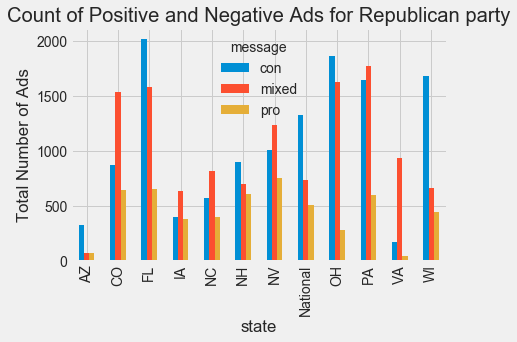

In [210]:
df_ad_state_party_8.plot(kind='bar')
plt.ylabel('Total Number of Ads')
plt.title("Count of Positive and Negative Ads for Republican party")

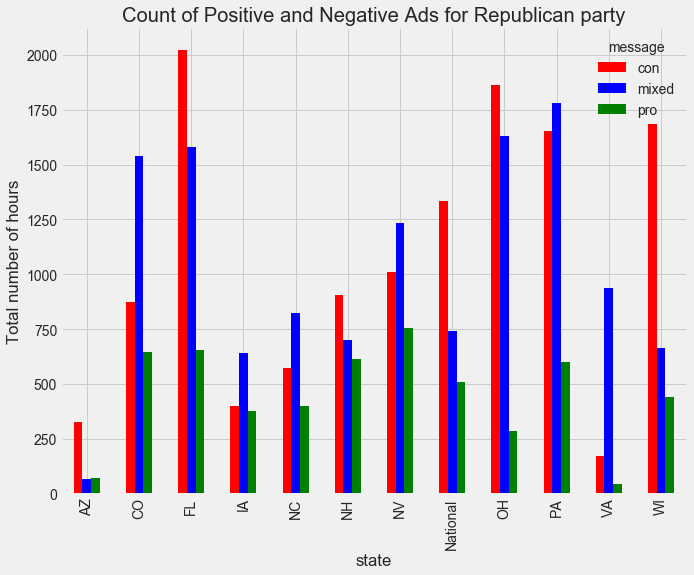

In [211]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = df_ad_state_party_8.plot.bar(ax=ax,color='rbgy')

ax.set(ylabel= 'Total number of hours',
       title = 'Count of Positive and Negative Ads for Republican party')
plt.savefig('ana_final_pics/count_pos_vs_neg_ads_for_Republican_party')


In [212]:
df_ad_state_party_9 = df_ad_state_party_3[df_ad_state_party_3['sponsor_party'] == 'D'].groupby(['state', 'message'])['ad_duration_secs'].sum().unstack()

In [213]:
df_ad_state_party_9 = df_ad_state_party_9/3600

In [214]:
df_ad_state_party_9

message,con,mixed,pro,unknown
state,,,,
AZ,16.401667,4.165556,4.408333,NaN
CO,15.318611,0.291944,0.353333,NaN
FL,46.702222,16.306389,13.476944,NaN
IA,19.743889,8.226667,8.785278,NaN
NC,26.575000,7.385833,11.088611,NaN
NH,17.878889,4.102222,3.177500,NaN
NV,44.909722,16.131667,15.497500,NaN
National,24.990278,4.818611,6.393056,9.833333
OH,39.273333,11.038056,12.433333,0.019444


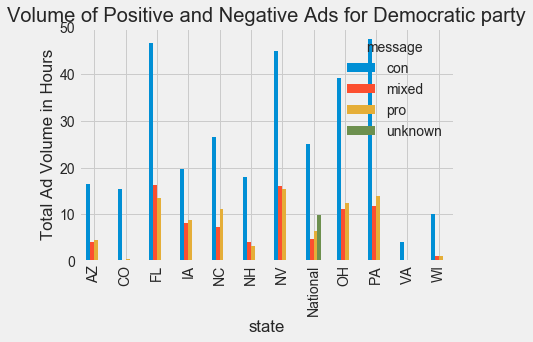

In [65]:
df_ad_state_party_9.plot(kind='bar')
plt.ylabel('Total Ad Volume in Hours')
plt.title("Volume of Positive and Negative Ads for Democratic party")

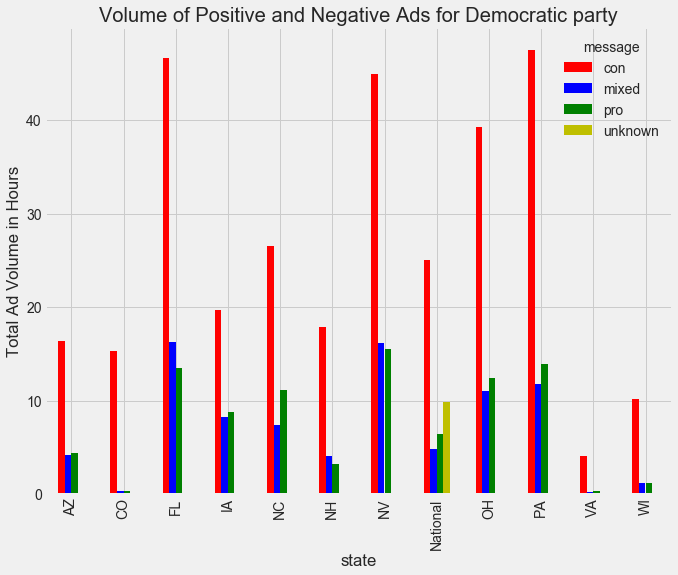

In [215]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = df_ad_state_party_9.plot.bar(ax=ax,color='rbgy')

ax.set(ylabel= 'Total Ad Volume in Hours',
       title = 'Volume of Positive and Negative Ads for Democratic party')  
plt.savefig('ana_final_pics/Vol_pos_vs_neg_ads_for_Democratic_party')

In [216]:
df_ad_state_party_10 = df_ad_state_party_3[df_ad_state_party_3['sponsor_party'] == 'R'].groupby(['state', 'message'])['ad_duration_secs'].sum().unstack()

In [217]:
#Convert seconds into hours
df_ad_state_party_10 = df_ad_state_party_10/3600

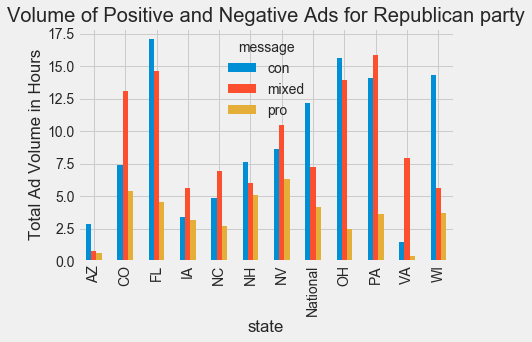

In [218]:
df_ad_state_party_10.plot(kind='bar')
plt.ylabel('Total Ad Volume in Hours')
plt.title("Volume of Positive and Negative Ads for Republican party")

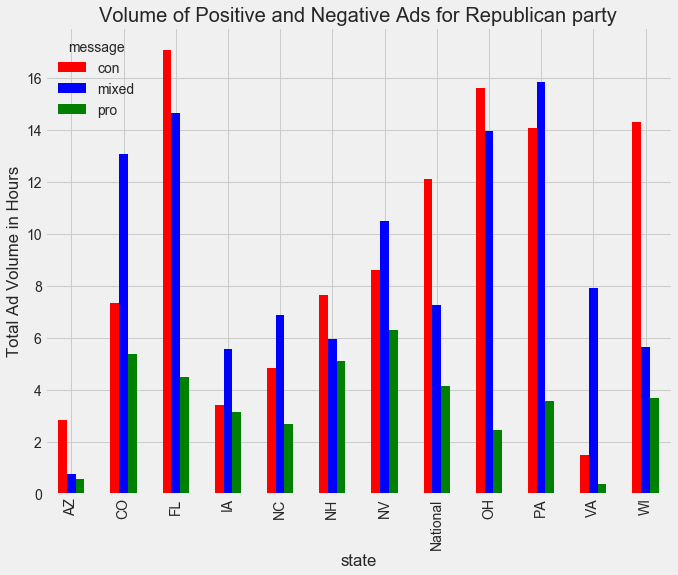

In [219]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = df_ad_state_party_10.plot.bar(ax=ax,color='rbgy')

ax.set(ylabel= 'Total Ad Volume in Hours',
       title = 'Volume of Positive and Negative Ads for Republican party')  
plt.savefig('ana_final_pics/vol_pos_vs_neg_ads_for_Rep_party')

In [102]:
#Pulling in state victory margins data 
#df_state_victory_margins = pd.read_csv('./state_victory_margins_data.csv')
df_Trump_2016_margins = pd.read_csv('./data/state_victory_margins_data1.csv')


In [103]:
df_Trump_2016_margins.sort_values('Net Trump Margins', ascending=False, inplace=True)

In [104]:
df_Trump_2016_margins

,state,2012 Percent margin,2012 Winner,2016 Percent margin,2016 Winner,Net Trump Margins,Comments
4,IA,5.81,D,9.41,R,15.22,changed D to R
3,OH,2.97,D,8.07,R,11.04,changed D to R
7,WI,6.94,D,0.76,R,7.70,changed D to R
5,PA,5.38,D,0.72,R,6.10,changed D to R
9,NH,5.58,D,0.37,D,5.21,fell for D
0,NV,6.68,D,2.42,D,4.26,margin fell for D
1,NC,2.04,R,3.66,R,1.62,increased for R
6,CO,5.36,D,4.91,D,0.45,margin fell for D
2,FL,0.88,D,1.19,R,0.31,increased for R
10,VA,3.86,D,5.32,D,-1.46,fell for R


In [74]:
df_Trump_2016_margins.columns

Index(['state', '2012 Percent margin ', '2012 Winner', '2016 Percent margin',
       '2016 Winner', 'Net Trump Margins', 'Comments'],
      dtype='object')

In [75]:
df_Trump_2016_margins.index

Int64Index([4, 3, 7, 5, 9, 0, 1, 6, 2, 10, 8], dtype='int64')

In [109]:
df_ad_state_party_6.columns

Index(['D', 'I', 'R'], dtype='object', name='sponsor_party')

In [200]:
df_ad_state_party_6['Diff between R & D'] = df_ad_state_party_6['R']- df_ad_state_party_6['D']

In [201]:
df_ad_state_party_6.sort_values('Diff between R & D', ascending=False, inplace=True)

In [202]:
df_ad_state_party_6

sponsor_party,D,I,R,Diff between R & D
state,,,,
WI,12.40,NaN,23.64,11.24
CO,15.96,NaN,25.82,9.86
VA,4.62,NaN,9.77,5.15
NH,25.16,NaN,18.73,-6.43
AZ,24.98,NaN,4.21,-20.77
National,46.04,0.20,23.53,-22.51
IA,36.76,0.77,12.17,-24.59
NC,45.05,NaN,14.42,-30.63
OH,62.76,0.01,32.06,-30.70


In [80]:
df_ad_state_party_6.index

Index(['WI', 'CO', 'VA', 'NH', 'AZ', 'National', 'IA', 'NC', 'OH', 'PA', 'FL',
       'NV'],
      dtype='object', name='state')

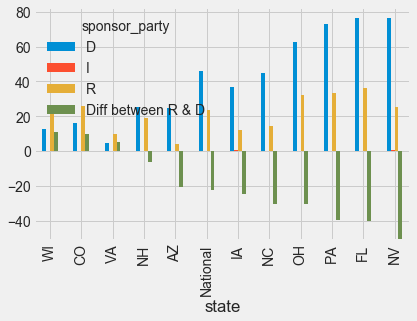

In [203]:
#This is a repeat of the plot earlier
df_ad_state_party_6.plot(kind='bar')

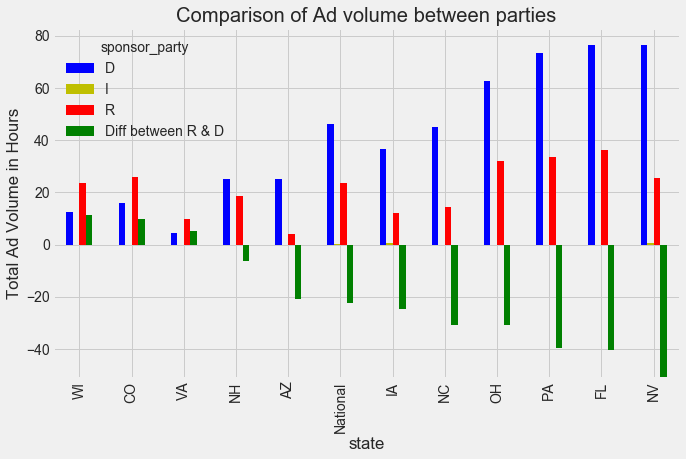

In [204]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = df_ad_state_party_6.plot.bar(ax=ax,color='byrg')

ax.set(ylabel= 'Total Ad Volume in Hours',
       title = 'Comparison of Ad volume between parties')
plt.savefig('ana_final_pics/Ad volume comparison between parties.png')

In [82]:
df_Trump_2016_margins.set_index('state', inplace=True)

In [83]:
df_Trump_2016_margins

,2012 Percent margin,2012 Winner,2016 Percent margin,2016 Winner,Net Trump Margins,Comments
state,,,,,,
IA,5.81,D,9.41,R,15.22,changed D to R
OH,2.97,D,8.07,R,11.04,changed D to R
WI,6.94,D,0.76,R,7.70,changed D to R
PA,5.38,D,0.72,R,6.10,changed D to R
NH,5.58,D,0.37,D,5.21,fell for D
NV,6.68,D,2.42,D,4.26,margin fell for D
NC,2.04,R,3.66,R,1.62,increased for R
CO,5.36,D,4.91,D,0.45,margin fell for D
FL,0.88,D,1.19,R,0.31,increased for R


In [84]:
merged_df = df_Trump_2016_margins.join(df_ad_state_party_6)

In [85]:
merged_df.head()

,2012 Percent margin,2012 Winner,2016 Percent margin,2016 Winner,Net Trump Margins,Comments,D,I,R,Trump Ad Difference
state,,,,,,,,,,
IA,5.81,D,9.41,R,15.22,changed D to R,36.76,0.77,12.17,-24.59
OH,2.97,D,8.07,R,11.04,changed D to R,62.76,0.01,32.06,-30.70
WI,6.94,D,0.76,R,7.70,changed D to R,12.40,NaN,23.64,11.24
PA,5.38,D,0.72,R,6.10,changed D to R,73.25,NaN,33.51,-39.74
NH,5.58,D,0.37,D,5.21,fell for D,25.16,NaN,18.73,-6.43


In [86]:
#Save dataframe to pickle file
merged_df.to_pickle('./data/TV_AD_TRUMP_VOLUME_VICTORY_MARGINES_7.pkl')

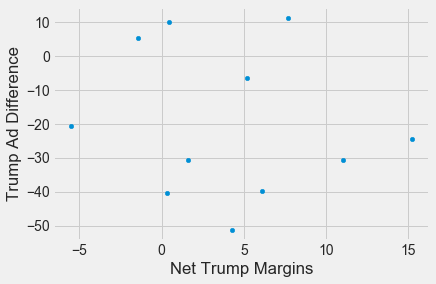

In [87]:
merged_df.plot(x='Net Trump Margins', y='Trump Ad Difference', kind='scatter')